# Problem 1

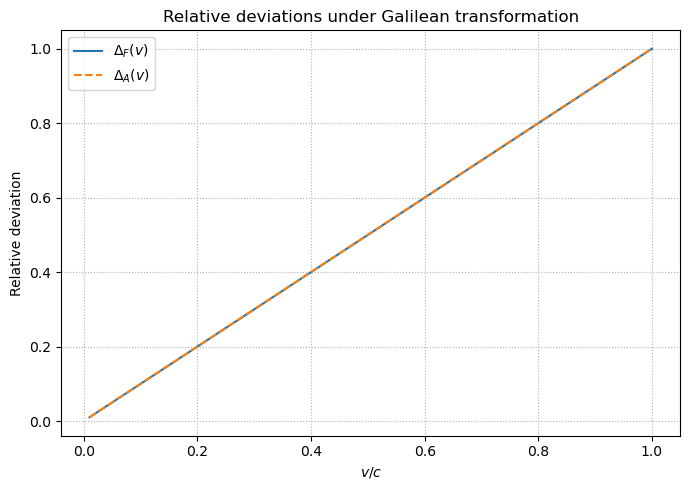

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 1.0   # natural units
eps0 = 1.0

# v range
v_vals = np.linspace(0.01, 0.9999, 400)  # v/c

# For plane wave with rho=0, J=0, both deviations reduce to v/c
Delta_F = v_vals / c
Delta_A = v_vals / c

# Plot
plt.figure(figsize=(7,5))
plt.plot(v_vals, Delta_F, label=r"$\Delta_F(v)$")
plt.plot(v_vals, Delta_A, '--', label=r"$\Delta_A(v)$")
plt.xlabel(r"$v/c$")
plt.ylabel("Relative deviation")
plt.title("Relative deviations under Galilean transformation")
plt.grid(True, ls=":")
plt.legend()
plt.tight_layout()
plt.show()


# Problem 2

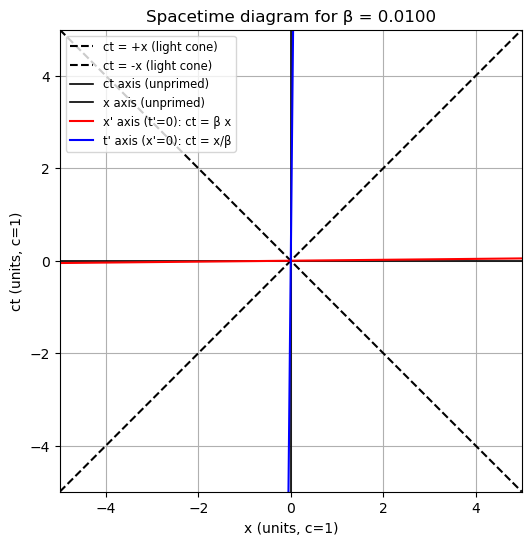

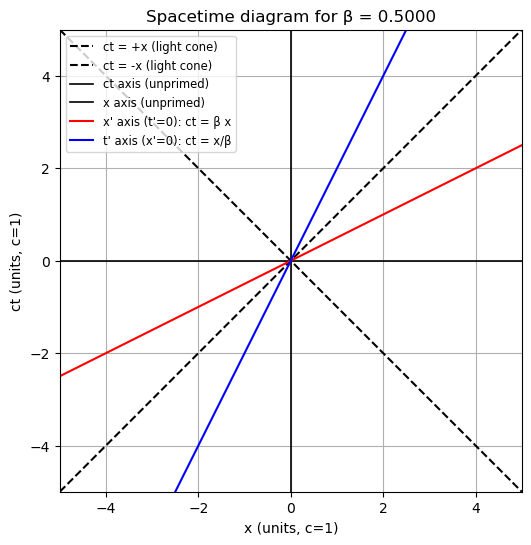

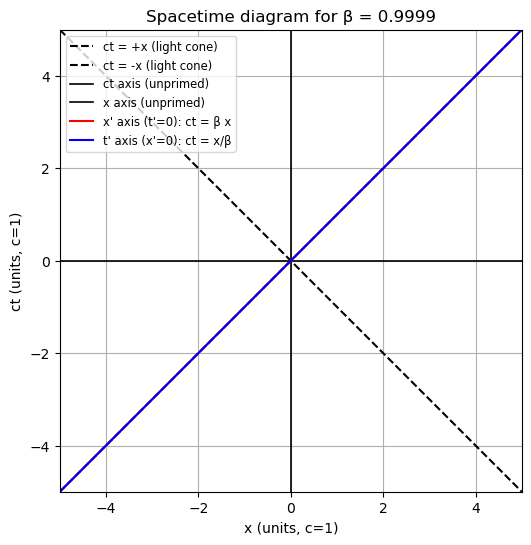

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Use natural units (c = 1) so ct and x have same units
c = 1.0
betas = [0.01, 0.5, 0.9999]  # v/c values
x = np.linspace(-5, 5, 1001) # horizontal range

for beta in betas:
    # Equations of primed axes:
    # x' axis (t' = 0): ct = beta * x
    ct_xaxis = beta * x
    # t' axis (x' = 0): ct = (1/beta) * x
    ct_taxis = (1.0 / beta) * x

    plt.figure(figsize=(6,6))
    
    # Light cone lines
    plt.plot(x, x, 'k--', label='ct = +x (light cone)')
    plt.plot(x, -x, 'k--', label='ct = -x (light cone)')

    # Unprimed axes
    plt.axhline(0, color='black', linewidth=1.2, label='ct axis (unprimed)')
    plt.axvline(0, color='black', linewidth=1.2, label='x axis (unprimed)')

    # Primed axes
    plt.plot(x, ct_xaxis, 'r', label="x' axis (t'=0): ct = β x")
    plt.plot(x, ct_taxis, 'b', label="t' axis (x'=0): ct = x/β")

    # Formatting
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel("x (units, c=1)")
    plt.ylabel("ct (units, c=1)")
    plt.title(f"Spacetime diagram for β = {beta:.4f}")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.legend(loc='upper left', fontsize='small')
    
    plt.show()


# Problem 3

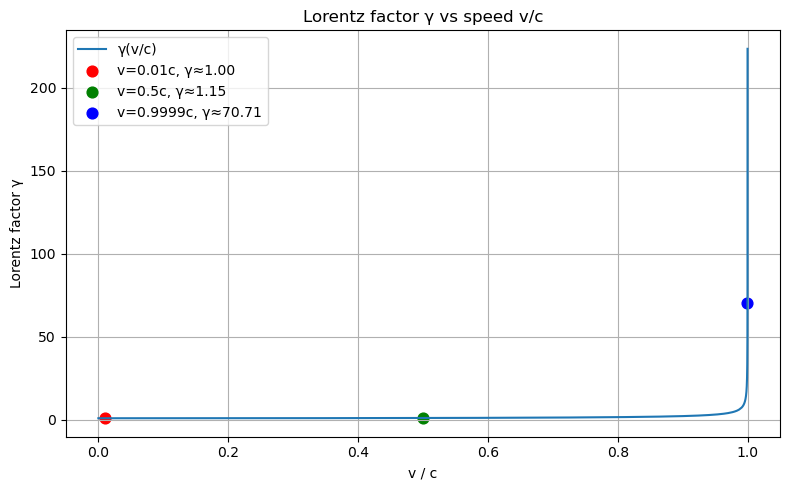

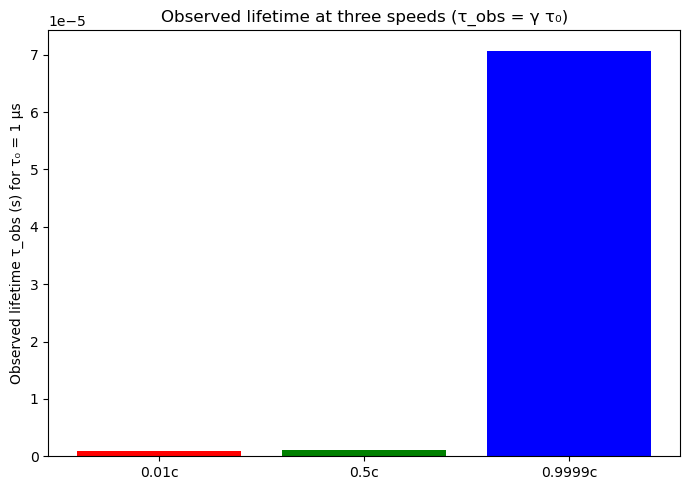

Proper lifetime τ₀ = 1e-06 s
v = 0.01 c  -> γ = 1.00005  -> τ_obs = 1.00005000e-06 s
v = 0.5 c  -> γ = 1.1547005  -> τ_obs = 1.15470054e-06 s
v = 0.9999 c  -> γ = 70.712446  -> τ_obs = 7.07124460e-05 s


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants ---
c = 299792458.0      # speed of light in m/s
tau0 = 1e-6          # proper lifetime (s), here 1 microsecond

# --- Function for Lorentz factor ---
def gamma(v):
    beta = v / c
    return 1.0 / np.sqrt(1 - beta**2)

# --- Speeds of interest ---
vel_fracs = [0.01, 0.5, 0.9999]  # fractions of c
vels = [vf * c for vf in vel_fracs]
gammas = [gamma(v) for v in vels]
tau_obs = [g * tau0 for g in gammas]

# --- Continuous curve for γ vs v/c ---
vf_cont = np.concatenate((np.linspace(0, 0.99, 300),
                          np.linspace(0.99, 0.99999, 300)))
gamma_cont = 1.0 / np.sqrt(1 - vf_cont**2)

plt.figure(figsize=(8,5))
plt.plot(vf_cont, gamma_cont, label='γ(v/c)')
colors = ['red', 'green', 'blue']

# Mark the three points
for vf, g, col in zip(vel_fracs, gammas, colors):
    plt.scatter(vf, g, color=col, s=60, label=f'v={vf}c, γ≈{g:.2f}')

plt.xlabel('v / c')
plt.ylabel('Lorentz factor γ')
plt.title('Lorentz factor γ vs speed v/c')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Bar plot of observed lifetimes ---
plt.figure(figsize=(7,5))
positions = np.arange(len(vel_fracs))
plt.bar(positions, tau_obs, color=colors)
plt.xticks(positions, [f'{vf}c' for vf in vel_fracs])
plt.ylabel('Observed lifetime τ_obs (s) for τ₀ = 1 μs')
plt.title('Observed lifetime at three speeds (τ_obs = γ τ₀)')
plt.tight_layout()
plt.show()

# --- Print numeric results ---
print(f"Proper lifetime τ₀ = {tau0:.3g} s")
for vf, g, tobs in zip(vel_fracs, gammas, tau_obs):
    print(f"v = {vf} c  -> γ = {g:.8g}  -> τ_obs = {tobs:.8e} s")
